  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

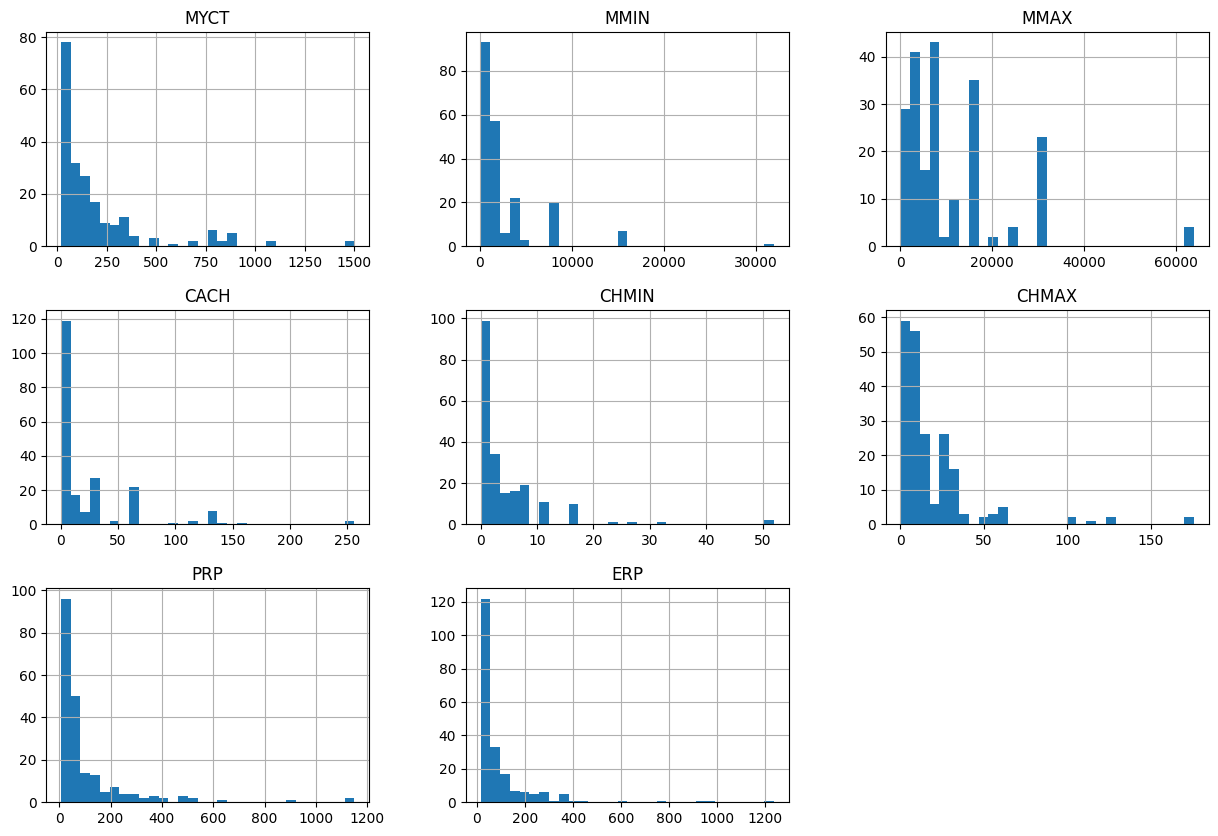

Train MSE: 3117.658905430178
Train MAE: 35.12200634651684
Train R^2: 0.8378284557995717
Test MSE: 5633.068155793257
Test MAE: 48.06880134700476
Test R^2: 0.8893455830696775
Cross-validated MSE: 5941.453778179226
Cross-validated MAE: 40.98972927246382
Cross-validated R^2: 0.650822482173121


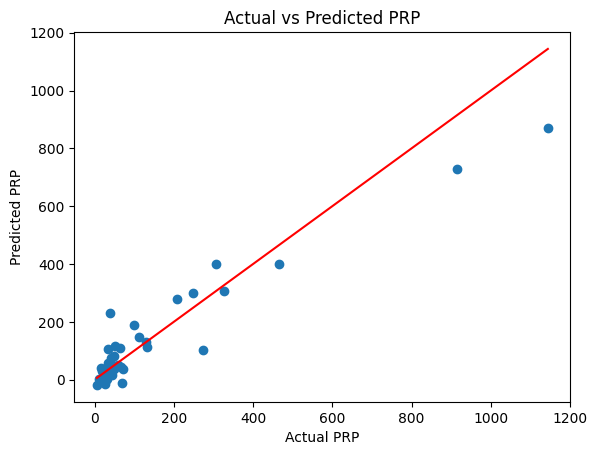

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
file_path = 'machine.data_update.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())
print(data.info())
print(data.describe())

# 데이터 컬럼명 지정 (만약 데이터셋에 헤더가 없는 경우)
data.columns = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

# 필요 없는 열 제거 (vendor_name, model_name, ERP 등)
data = data.drop(columns=['vendor_name', 'model_name'])

# 결측치 확인
print(data.isnull().sum())

# 히스토그램
data.hist(bins=30, figsize=(15, 10))
plt.show()

# 특징과 타겟 변수 분리
features = data.drop(columns=['PRP', 'ERP'])
target = data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 훈련 데이터와 테스트 데이터에 대한 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 훈련 데이터 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 테스트 데이터 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

cv_mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_mae_scores.mean()

cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()

# 결과 출력
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train R^2: {train_r2}")

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R^2: {test_r2}")

print(f"Cross-validated MSE: {cv_mse}")
print(f"Cross-validated MAE: {cv_mae}")
print(f"Cross-validated R^2: {cv_r2}")

# 예측 값과 실제 값 시각화
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.show()


  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

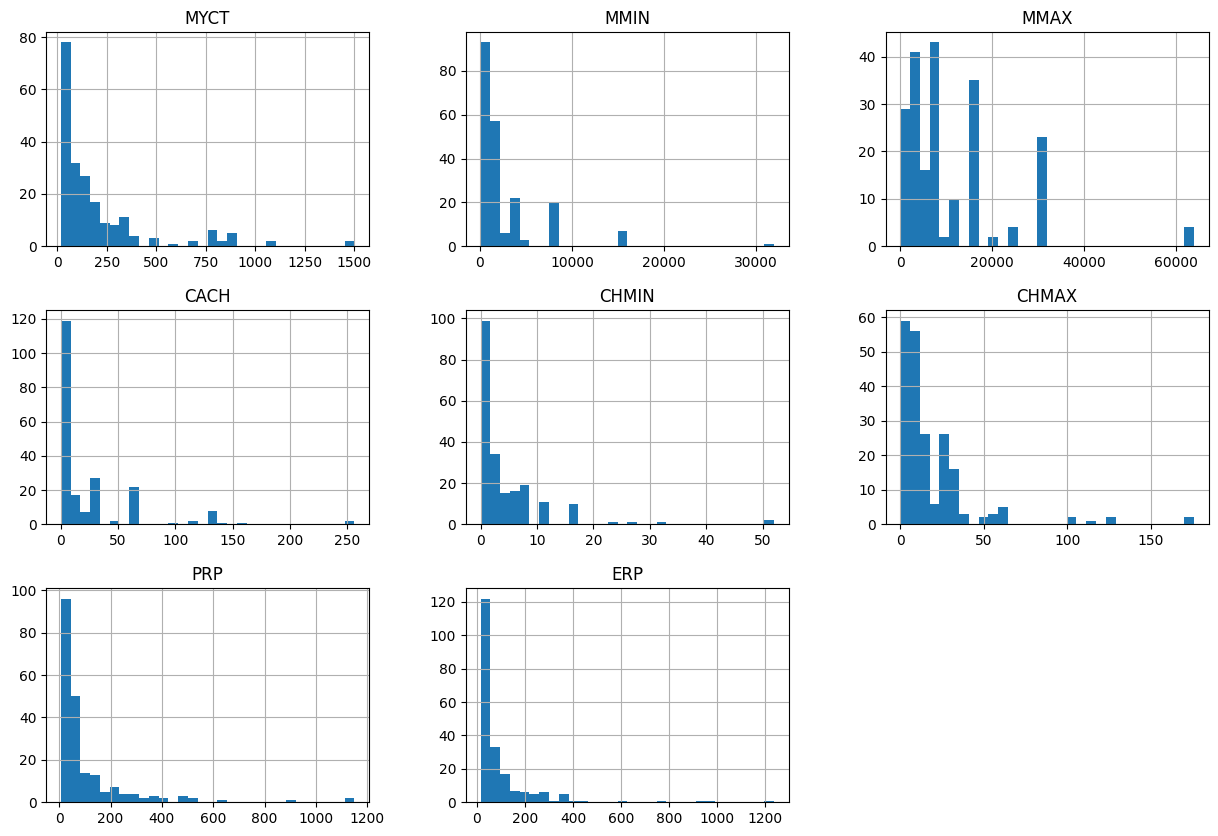

Train MSE: 1529.020470551296
Train MAE: 23.232255784639325
Train R^2: 0.9204648044109383
Test MSE: 2370.096374775837
Test MAE: 31.406218675535623
Test R^2: 0.9534424890368542
Cross-validated MSE: 2611.435766839488
Cross-validated MAE: 27.519659384521866
Cross-validated R^2: 0.847991461557509


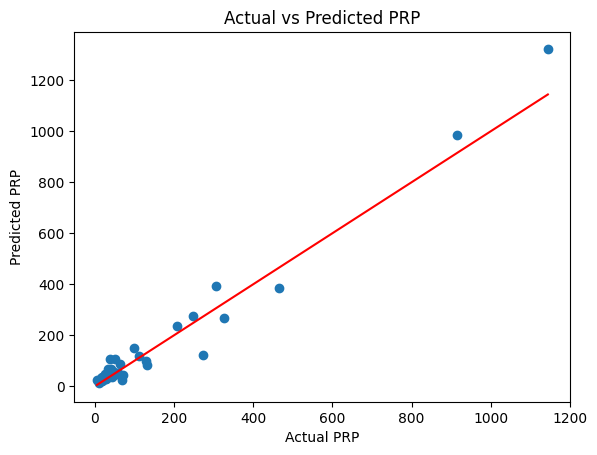

In [2]:
#  R^2가 90% 이상이 나오도록 모델을 개선

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
file_path = 'machine.data_update.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())
print(data.info())
print(data.describe())

# 데이터 컬럼명 지정 (만약 데이터셋에 헤더가 없는 경우)
data.columns = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

# 필요 없는 열 제거 (vendor_name, model_name, ERP 등)
data = data.drop(columns=['vendor_name', 'model_name'])

# 결측치 확인
print(data.isnull().sum())

# 히스토그램
data.hist(bins=30, figsize=(15, 10))
plt.show()

# 특징(features)와 타겟(target) 변수 분리
features = data.drop(columns=['PRP'])
target = data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 훈련 데이터와 테스트 데이터에 대한 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 훈련 데이터 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 테스트 데이터 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

cv_mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_mae_scores.mean()

cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()

# 결과 출력
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train R^2: {train_r2}")

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R^2: {test_r2}")

print(f"Cross-validated MSE: {cv_mse}")
print(f"Cross-validated MAE: {cv_mae}")
print(f"Cross-validated R^2: {cv_r2}")

# 예측 값과 실제 값 시각화
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.show()